<h1 style="text-align: center;"><strong>Predicting the power output of solar panels in Egypt</strong></h1>

<h3 style="text-align: center;"><b>Step 0: Frame the problem.</b></h3>

#### Specific Problem
The specific problem is developing a model to predict the power output of solar panels in Egypt, taking into account the **recent impact of climate change** on solar power generation. This is challenging because existing prediction models might not accurately account for the altered weather patterns and their effects on solar panel performance.

#### What we are trying to achieve:
The main goal is to create a reliable prediction model that enables better management of energy consumption. By accurately predicting the power output of solar panels.

#### Key factors influencing solar panel power output:
**Several factors contribute to the power output of solar panels:**

- Weather conditions: Temperature, humidity, wind speed, cloud cover, and pressure directly influence solar panel efficiency and power generation.

- Solar irradiance: This is the amount of solar energy hitting the panels and is a primary driver of power output.

- Time of day and season: Solar radiation and therefore power output vary significantly throughout the day and year.

- Panel characteristics: The type, age, orientation, and efficiency of the solar panels themselves impact their overall performance.



<h3 style="text-align: center;"><b>Step 2: Prepare data</b></h3>

1. First we need to import the libraries we're going to use in step 2.

In [4369]:
# Data manipulation and analysis
import pandas as pd  
import numpy as np 

# Visualization libraries
import matplotlib.pyplot as plt  
import seaborn as sns  

# To make the tables look pretty
from IPython.display import display 

# Feature scaling
from sklearn.preprocessing import StandardScaler  

# Model training and evaluation
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression  
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge  
from sklearn.tree import DecisionTreeRegressor  
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Model tuning and evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  
from sklearn.model_selection import GridSearchCV 

2. Next we add the Aswan Weather Dataset to the notebook.

In [4370]:
dataframe = pd.read_csv("Aswan Weather Data.csv")

<h4 style="text-align: center;"><b>2.1 Explore & Visualise</b></h4>

1. In order to understand what we're working with we need to see what the data looks like.

In [4371]:
display(dataframe.head())

,Date,AvgTemp,AverageDew,Humidity,Wind,Pressure,Solar(PV)
0,2023-01-01,87.9,31.3,13.4,5.7,29.2,325.260557
1,2023-01-02,90.2,34.0,14.2,6.6,29.1,319.158927
2,2023-01-03,93.2,31.4,11.8,8.8,29.1,351.777739
3,2023-01-04,92.5,24.9,9.4,8.0,29.1,324.383284
4,2023-01-05,91.2,18.9,7.8,9.4,29.2,71.311129


**Observations**
- Looking at the first rows of the dataset we can see that in total we have 7 features. "Date" is of type date and all of the others look like floats.
- The high temperatures also tell us that the temperature is measured in degrees Fahrenheit.

2. Now that we know what the dataset looks like, we want to get more info about the dataset we're working with.

In [4372]:
# Displaying the result we'd get from data.info() in a table so it looks nicer. I'm also adding a memory usage column so that we get the memory usage for each row.
data_info = pd.DataFrame({
    "Column": dataframe.columns,
    "Data Type": dataframe.dtypes,
    "Non-Null Count": dataframe.notnull().sum(),
    "Memory Usage (KB)": dataframe.memory_usage(deep=True, index=False) / 1024
})

display(data_info)

,Column,Data Type,Non-Null Count,Memory Usage (KB)
Date,Date,object,398,22.931641
AvgTemp,AvgTemp,float64,387,3.109375
AverageDew,AverageDew,float64,398,3.109375
Humidity,Humidity,float64,398,3.109375
Wind,Wind,float64,398,3.109375
Pressure,Pressure,float64,398,3.109375
Solar(PV),Solar(PV),float64,398,3.109375


**Observations:**
- First of all we can see that the Date column is of type object and not date. I'll need to fix this because it may produce errors.
- Second of all we can see that in the AvgTemp we have some missing values. I'll need to fix this too.

3. Now we want to get a more in depth description of the dataset.

In [4373]:
display(dataframe.describe())

,AvgTemp,AverageDew,Humidity,Wind,Pressure,Solar(PV)
count,387.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,81.695090,36.754020,22.968090,10.108397,29.183040,610.080652
std,13.600602,8.906835,9.756598,2.895406,0.140241,290.406354
min,51.600000,15.300000,7.400000,0.122741,28.900000,-77.353827
25%,70.700000,29.625000,15.625000,8.300000,29.100000,400.026461
50%,84.800000,37.250000,20.500000,10.100000,29.200000,604.223807
75%,93.200000,44.000000,28.975000,12.000000,29.300000,798.510886
max,102.700000,63.900000,47.700000,20.170727,29.600000,1535.892137


**Observations:**
- Once again we can see the 11 missing values in the "AvgTemp" column.
- The minimum for "Solar(PV)" is -77.353827 which tells us that there's an outlier since we can't have a negative value for the solar panel power.
- The std for "Solar(PV)" is 290.406354 which tells us that the data in this feature is more spread out.
- The maximum value of "Solar(PV)" is 1535.892137 which is very high compared to the rest of the values in this column. 
- The pressure values show very little variability, with a standard deviation of only 0.140241. This means that the pressure might not be a very important factor influencing solar panel power output in the dataset.

4. Before we start visualizing the data, we have to convert the "Date" feature to the date data type.

In [4374]:
dataframe['Date'] = pd.to_datetime(dataframe['Date'])


5. Now I'll start by using line charts to visualise the variability of the features over time.

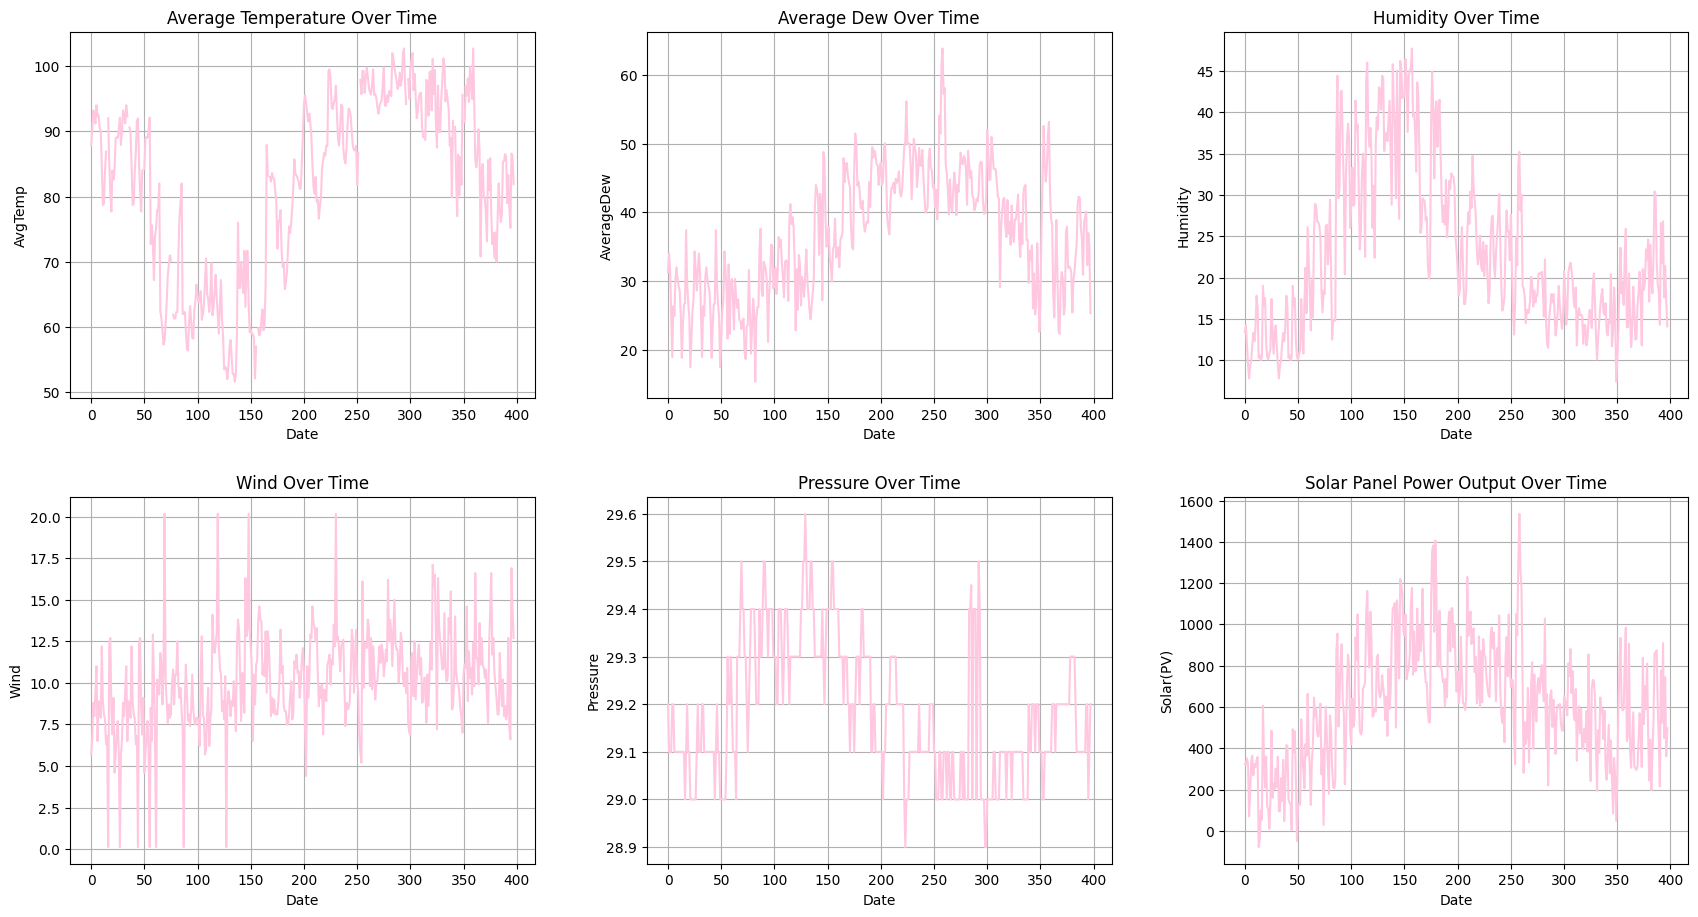

In [4375]:
# Create a grid of subplots 
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.tight_layout(pad=5) # Padding

columns = ['AvgTemp', 'AverageDew', 'Humidity', 'Wind', 'Pressure', 'Solar(PV)'] # Columns in the dataframe
# Titles of the plots
titles = [
    "Average Temperature Over Time",
    "Average Dew Over Time",
    "Humidity Over Time",
    "Wind Over Time",
    "Pressure Over Time",
    "Solar Panel Power Output Over Time"
]

# Line color
line_color = "#ffc8e0"

# Iterating over each column
for ax, col, title in zip(axes.flatten(), columns, titles):
    ax.plot(dataframe[col], color=line_color)  
    ax.set_xlabel("Date")
    ax.set_ylabel(col)
    ax.set_title(title)
    ax.grid(True)

plt.show()


6. Now I'll use scatter plots to look at the relationships between the Solar Power and the other numeric independent variables: AvgTemp, AverageDew, Humidity, Wind and Pressure.

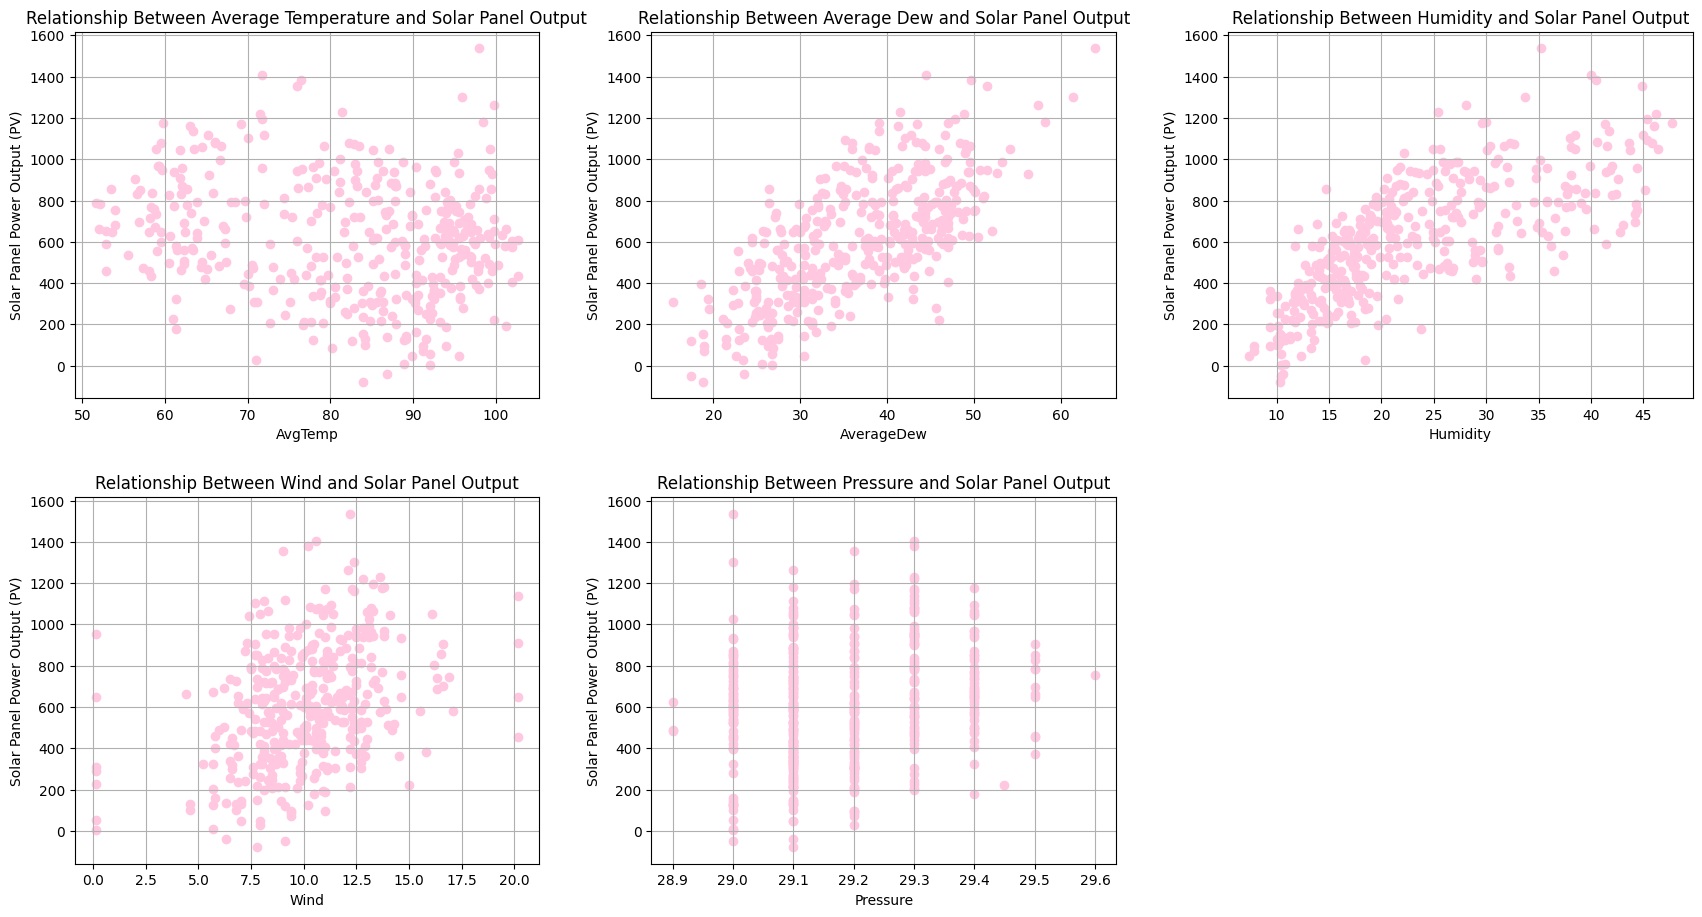

In [4376]:
# Create a grid of subplots 
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.tight_layout(pad=5) # Padding

# List of x-labels
x_columns = ['AvgTemp', 'AverageDew', 'Humidity', 'Wind', 'Pressure']
# y-labels
y_column = 'Solar(PV)'
# titles
titles = [
    "Relationship Between Average Temperature and Solar Panel Output",
    "Relationship Between Average Dew and Solar Panel Output",
    "Relationship Between Humidity and Solar Panel Output",
    "Relationship Between Wind and Solar Panel Output",
    "Relationship Between Pressure and Solar Panel Output"
]

point_color = "#ffc8e0"

# Iterating over the axes, x_columns, and titles
for ax, x_col, title in zip(axes.flatten(), x_columns + [None], titles + [""]):
    if x_col is not None:
        ax.scatter(dataframe[x_col], dataframe[y_column], color=point_color)  # Set point color
        ax.set_xlabel(x_col)
        ax.set_ylabel("Solar Panel Power Output (PV)")
        ax.set_title(title)
        ax.grid(True)
    else:
        ax.axis("off")  # Removing the extra subplot space

plt.show()


7. Now I'll use I will use histograms to visualize the distribution of numerical variables.

Distribution for: AvgTemp.


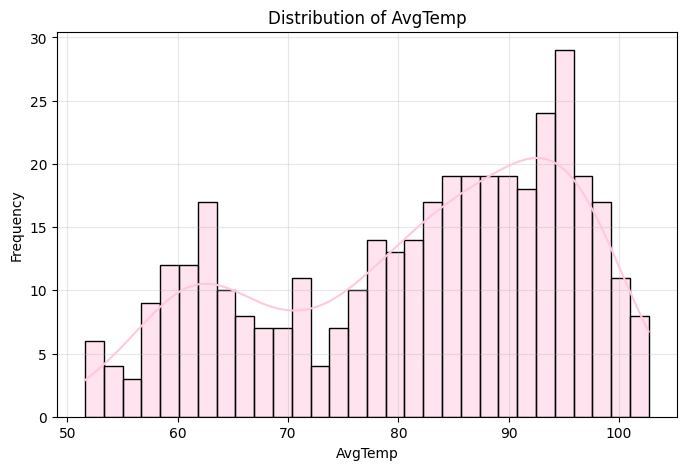

Distribution for: AverageDew.


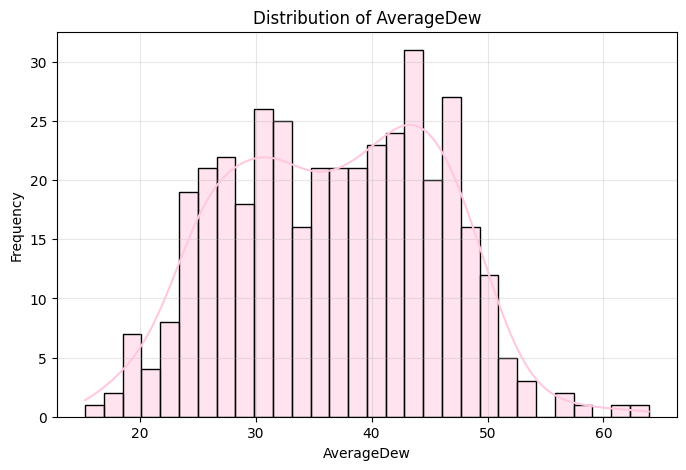

Distribution for: Humidity.


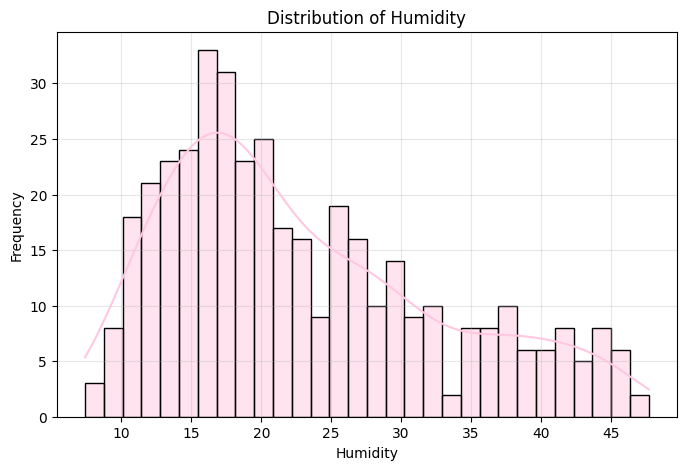

Distribution for: Wind.


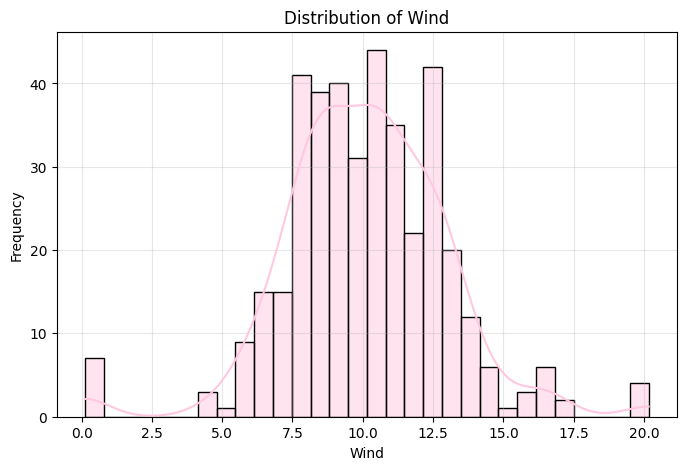

Distribution for: Pressure.


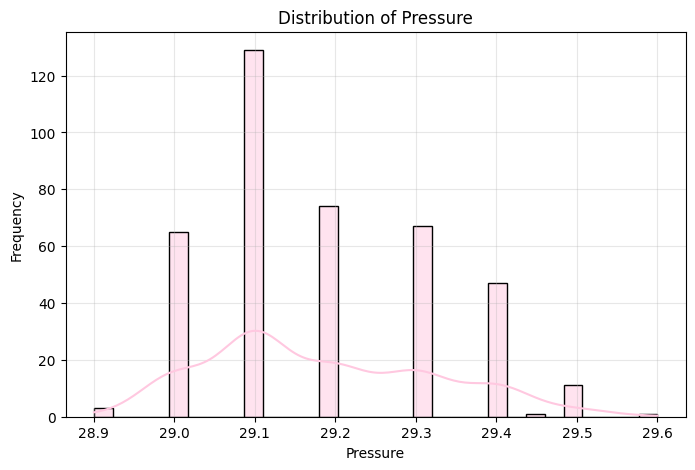

Distribution for: Solar(PV).


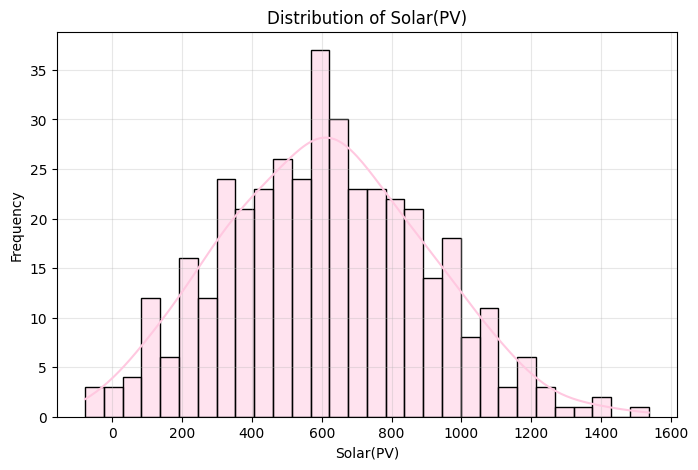

In [4377]:
for col in columns:
    print(f"Distribution for: {col}.")
    plt.figure(figsize=(8, 5))  
    sns.histplot(dataframe[col], kde=True, bins=30, color=line_color)  
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True, alpha=0.3) 
    plt.show()

8. Now I'll use a correlation matrix to look at the correlation coefficients between all pairs of numeric variables in the dataset. This will help us identify the potential predictors of "Solar(PV)".

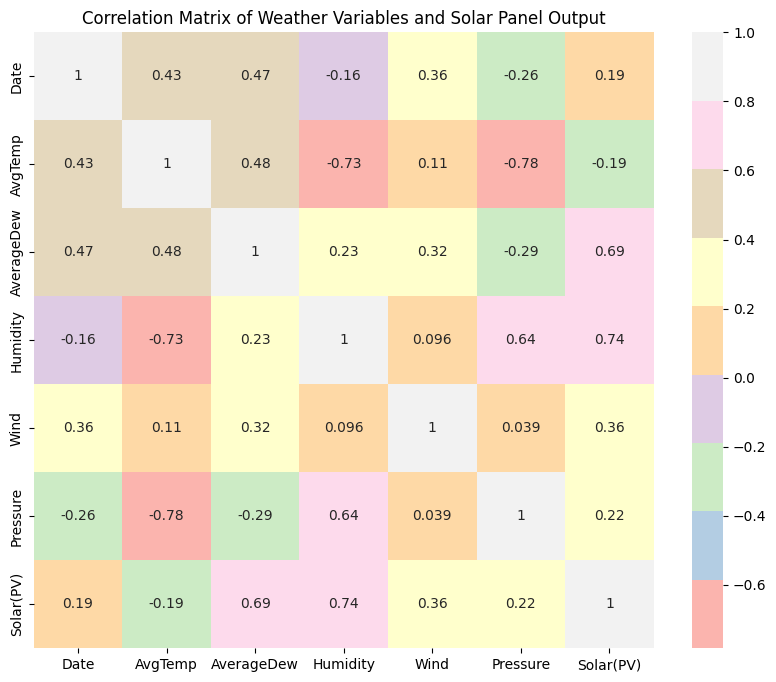

In [4378]:
correlation_matrix = dataframe.corr()

plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap="Pastel1")
plt.title("Correlation Matrix of Weather Variables and Solar Panel Output")
plt.show()

**Strong Positive Correlations with "Solar(PV)":**
- Humidity has the strongest positive correlation with "Solar(PV)" 0.739394. This could mean that as humidity levels rise, solar panel output tends to increase. 
- AverageDew also shows a strong positive correlation with "Solar(PV)" 0.685340, which means that  higher average dew correspond to increased solar panel output.

**Moderate Positive Correlations with "Solar(PV)":**
- Wind has a moderate positive correlation with "Solar(PV)" 0.360271. This could imply that windier conditions might, enhance solar panel output. 

**Weak Correlations with "Solar(PV)":**
- Pressure shows a weak positive correlation with "Solar(PV)" 0.223398. This tells us that pressure might have a minimal direct influence on solar power output.
- Date shows a very weak positive correlation with "Solar(PV)" 0.188027, which means that there's no strong linear trend in solar output over time based on the date.

**Negative Correlation with "Solar(PV)":**
- AvgTemp has a weak negative correlation with "Solar(PV)" -0.189841, indicating that higher average temperatures are slightly associated with lower solar panel output.

**Strong Negative Correlations between Independent Variables:**
- AvgTemp and Humidity have a strong negative correlation -0.729796.
- AvgTemp and Pressure also have a strong negative correlation -0.783360.

**Potential Multicollinearity:** 
- The strong correlations between some independent variables like the AvgTemp and Humidity could mean that there could be multicollinearity. This means that these variables might be providing redundant information to your model.


9. Now I'll use Histograms for each numeric variable to visualise the distribution of the data. In order to find the shape of the data and the presence of outliers.


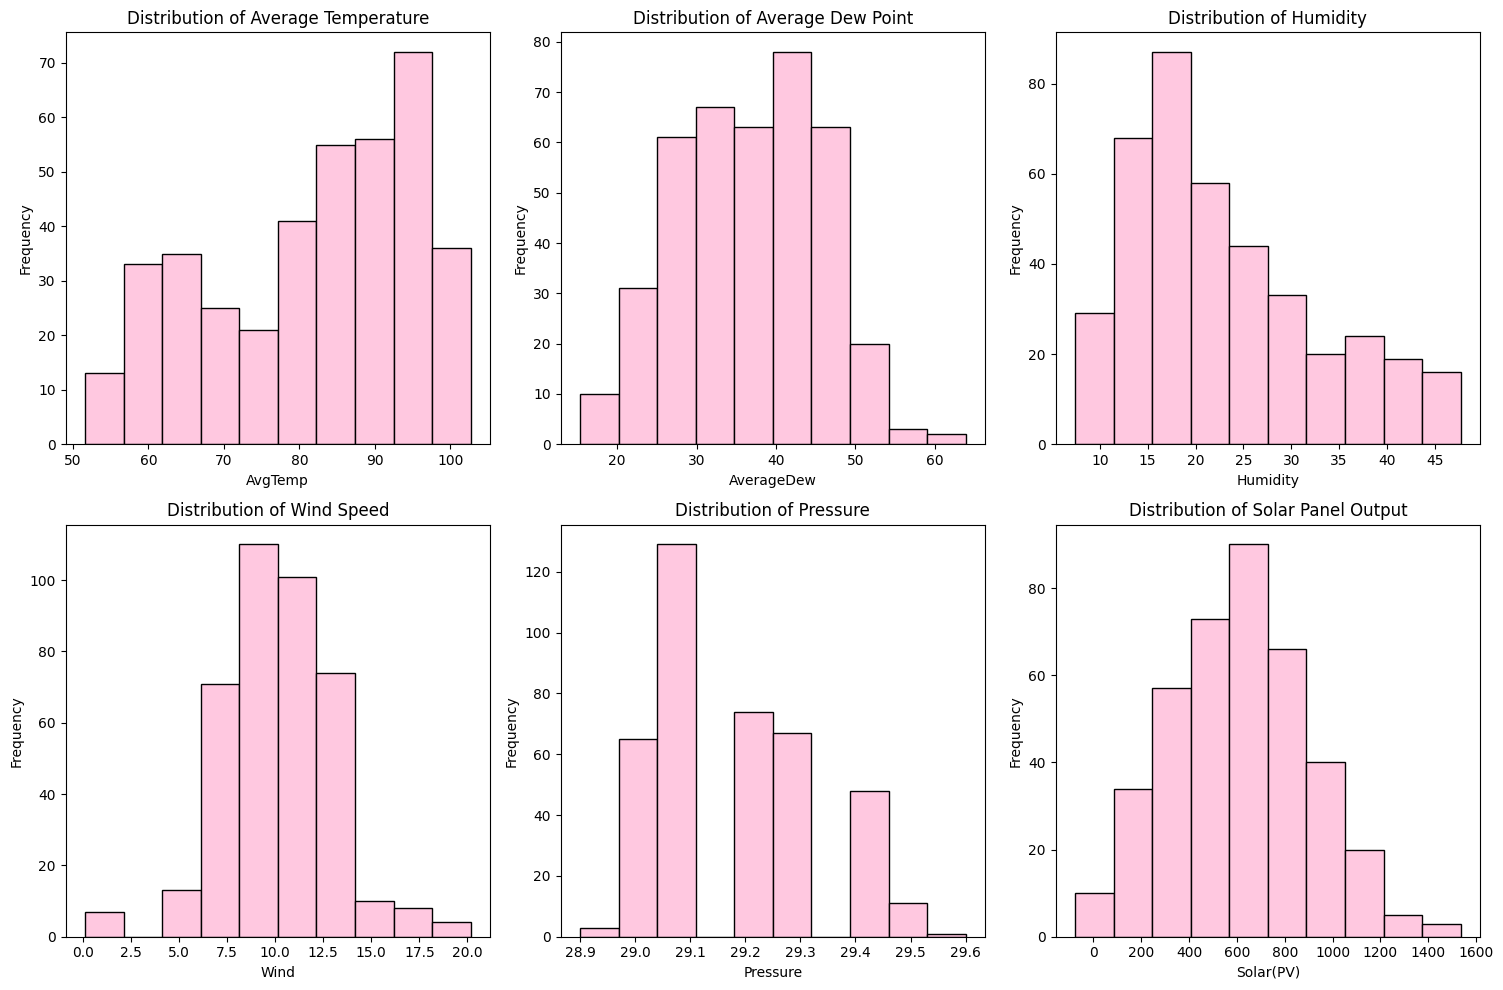

In [4379]:
# Create a grid of subplots 
plt.figure(figsize=(15, 10))

# List of variables and titles
columns = ['AvgTemp', 'AverageDew', 'Humidity', 'Wind', 'Pressure', 'Solar(PV)']
titles = [
    'Distribution of Average Temperature',
    'Distribution of Average Dew Point',
    'Distribution of Humidity',
    'Distribution of Wind Speed',
    'Distribution of Pressure',
    'Distribution of Solar Panel Output'
]

# Bar color
bar_color = "#ffc8e0"

# Looping through variables to create the subplots
for i, (col, title) in enumerate(zip(columns, titles), 1):
    plt.subplot(2, 3, i) 
    plt.hist(dataframe[col], bins=10, edgecolor='black', color=bar_color)  
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(title)

plt.tight_layout()
plt.show()


**Average Temperature (AvgTemp):**
- Moderate Left Skew
- Extreme values close to 51.6°F and 102.7°F may represent outliers.

**AverageDew:**
- Symmetrical
- Most values concentrated around the mean 36.75.
- Outliers may exist at the lower 15.3 or upper 63.9 ends of the range.

**Humidity:**
- Moderately skewed to the right
- Most observations clustering near the mean.
- Values near 7.4 or 47.7 could be outliers.

**Wind:**
- Symmetrical
- Outliers might appear in very low 0.12 or very high 20.17 wind speeds.

**Pressure:**
- Symmetrical, though slightly leaning toward a right skew.
- Values near the range limits 28.90 or 29.60 could be slight outliers.

**Solar(PV):**
- Symmetrical Symmetrical
- Values lower than 0 and higher than 1400 are likely outliers.

<h4 style="text-align: center;"><b>2.2 Data pre-processing</b></h4>

1. I'll start by handling the missing values in the "AvgTemp" column. I'll use linear interpolation because we're dealing with time series data and linear interpolation takes into account the temperatures before and after the missing data point.

In [4380]:
# Printing the number of rows with missing average temperature before interpolation
print(f"Before handling the missing values: {dataframe['AvgTemp'].isnull().sum()}\n")

# Displaying the rows with the missing average temperature
print("Rows with missing 'Avg Temp' values before interpolation:")
display(dataframe[dataframe['AvgTemp'].isnull()])

# Performing linear interpolation 
dataframe['AvgTemp'] = dataframe['AvgTemp'].interpolate(method='linear')

# Printing the number of rows with missing average temperature after interpolation
print(f"After handling the missing values: {dataframe['AvgTemp'].isnull().sum()}\n")

Before handling the missing values: 11

Rows with missing 'Avg Temp' values before interpolation:


,Date,AvgTemp,AverageDew,Humidity,Wind,Pressure,Solar(PV)
15,2023-01-16,NaN,26.6,10.0,6.8,29.1,101.340372
35,2023-02-05,NaN,30.4,11.9,8.9,29.1,146.600199
49,2023-02-19,NaN,17.4,10.4,9.1,29.0,-48.566417
76,2023-03-18,NaN,31.6,26.2,10.0,29.2,602.745178
156,2023-06-06,NaN,35.1,45.3,11.3,29.4,1095.187196
167,2023-06-17,NaN,47.0,29.6,12.3,29.3,1172.959228
252,2023-09-10,NaN,43.3,16.2,6.8,29.0,725.829182
297,2023-10-25,NaN,39.8,15.2,10.9,29.0,520.930947
313,2023-11-10,NaN,37.8,15.3,10.3,29.1,554.648060
341,2023-12-08,NaN,33.1,13.0,10.0,29.1,376.955593


After handling the missing values: 0



2. After handling the missing values we have to handle the outliers.

- First we'll display box plots to visualize the outliers.

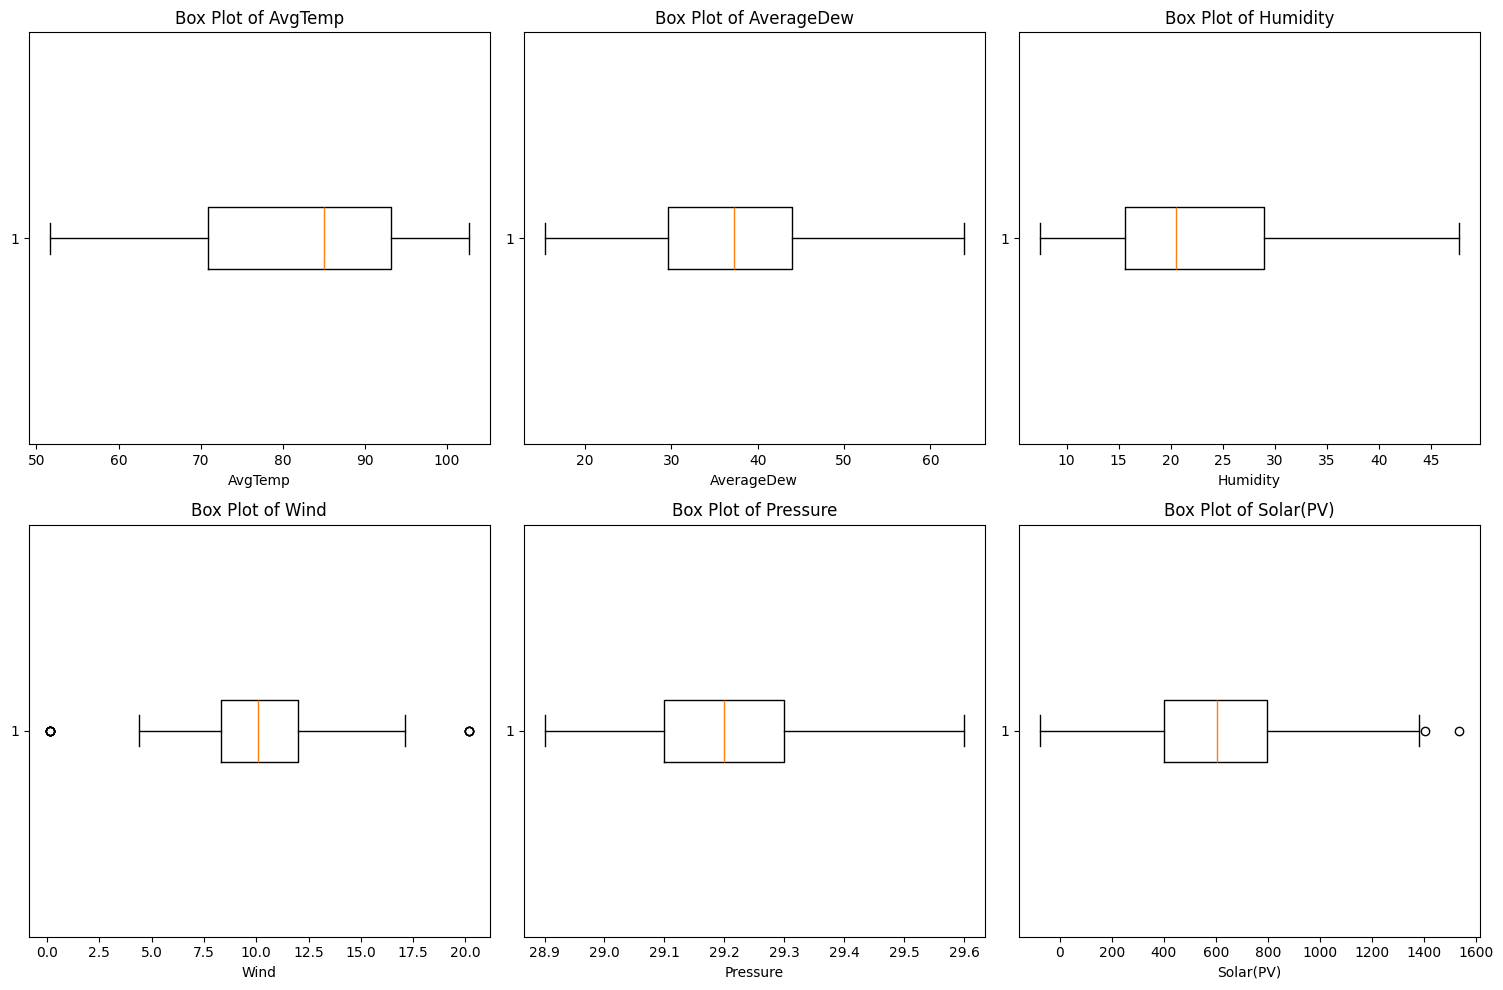

In [4381]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(dataframe.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(dataframe[column].dropna(), vert=False)
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

- Next I'll use IQR to handle the points outside the whiskers in box plots.

In [4382]:
# Defining a function to remove the outliers so we don't change the original dataframe
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Removing the outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Assigning the cleaned dataframe
cleaned_dataframe = remove_outliers_iqr(dataframe, columns)

# Showing the difference in the data size before and after cleaning
original_size = dataframe.shape[0]
cleaned_size = cleaned_dataframe.shape[0]
cleaned_outliers = original_size - cleaned_size

print("Outliers removed: ", cleaned_outliers, "\n")

print("Original Data Frame")
display(dataframe.drop(columns=["Date"]).describe())

print("Cleaned Data Frame")
display(cleaned_dataframe.drop(columns=["Date"]).describe())

Outliers removed:  14 

Original Data Frame


,AvgTemp,AverageDew,Humidity,Wind,Pressure,Solar(PV)
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,81.785176,36.754020,22.968090,10.108397,29.183040,610.080652
std,13.555443,8.906835,9.756598,2.895406,0.140241,290.406354
min,51.600000,15.300000,7.400000,0.122741,28.900000,-77.353827
25%,70.850000,29.625000,15.625000,8.300000,29.100000,400.026461
50%,85.050000,37.250000,20.500000,10.100000,29.200000,604.223807
75%,93.200000,44.000000,28.975000,12.000000,29.300000,798.510886
max,102.700000,63.900000,47.700000,20.170727,29.600000,1535.892137


Cleaned Data Frame


,AvgTemp,AverageDew,Humidity,Wind,Pressure,Solar(PV)
count,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000
mean,81.940885,36.781771,22.803385,10.178646,29.182161,606.357993
std,13.457131,8.813968,9.562332,2.406847,0.139097,279.215195
min,51.600000,15.300000,7.400000,4.400000,28.900000,-77.353827
25%,71.075000,29.975000,15.675000,8.400000,29.100000,405.721958
50%,85.100000,37.350000,20.500000,10.100000,29.200000,604.089318
75%,93.250000,44.000000,28.725000,12.000000,29.300000,794.586857
max,102.700000,61.400000,47.700000,17.100000,29.600000,1354.635208


- Now I'll display the box plots after removing the outliers.

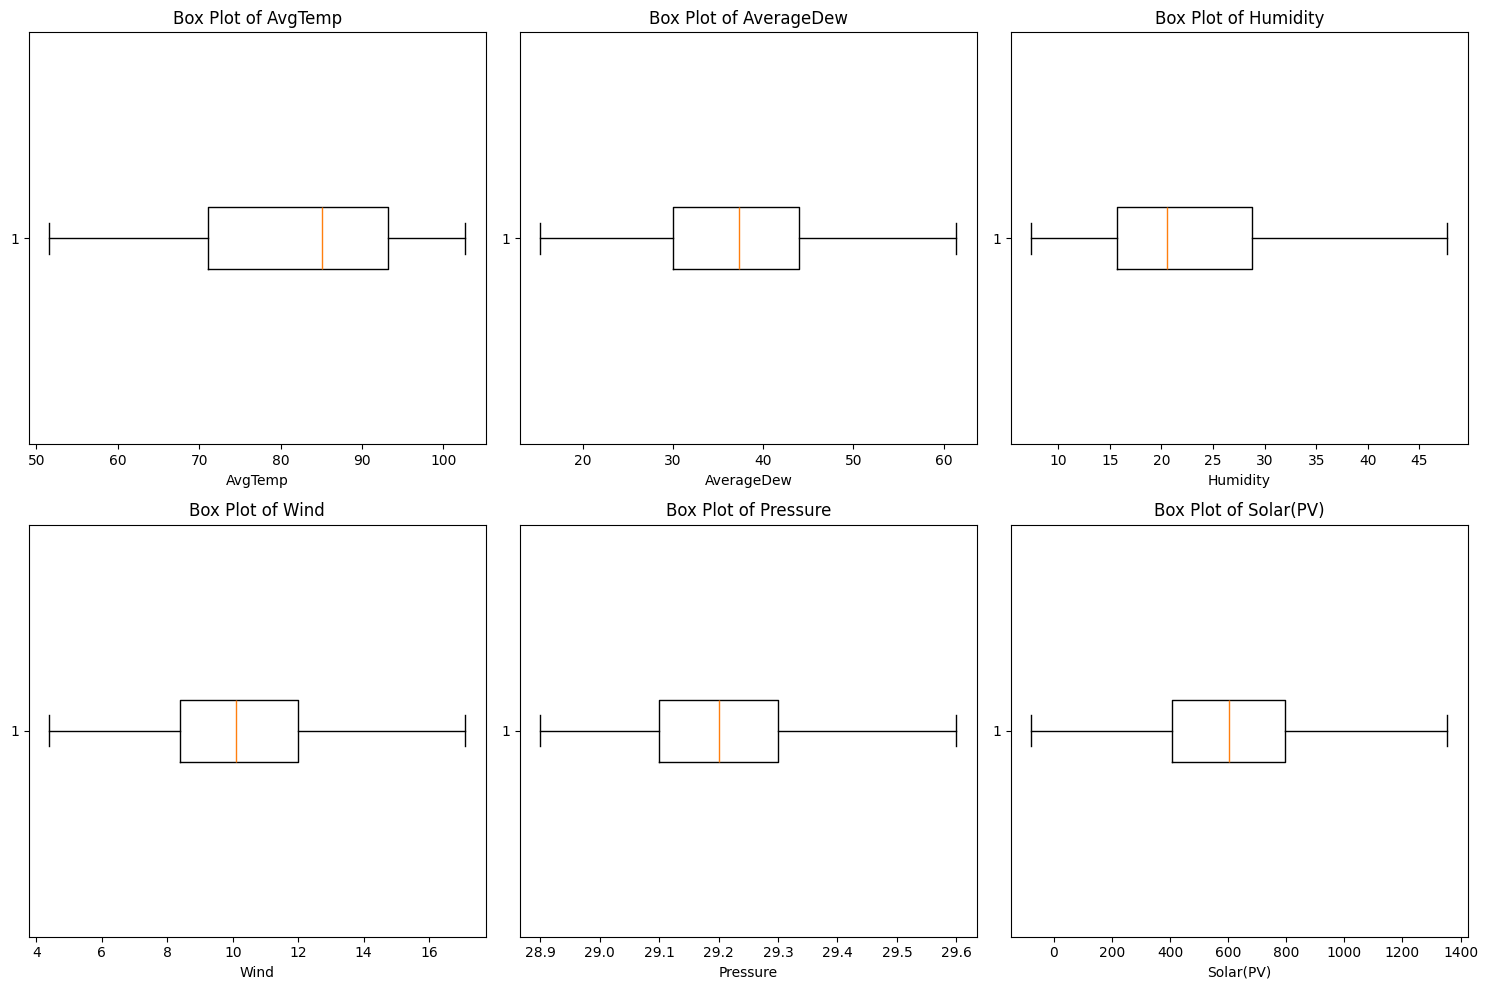

In [4383]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(cleaned_dataframe.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(cleaned_dataframe[column].dropna(), vert=False)
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

**Wind:**
- For the "Wind" feature, the Std dropped from 2.90 to 2.41, which means that we reduced variability.
- The Min increased from 0.12 to 4.4, showing that the low wind speed outlier was removed.
- Max decreased from 20.17 to 17.1, showing that the high wind speed outlier was removed.

**Solar (PV):**
- Mean decreased from 610.08 to 606.36, suggesting the removal of a few high or low outliers.
- Std went from 290.41 to 279.22.
- Max decreased from 1535.89 to 1354.64, showing the removal of the very high solar output value.

- Now I'll use MAD to further clean the dataframe. 

In [4384]:
# Defining a function to remove the outliers so we don't change the original dataframe
def remove_outliers_mad(df, columns, threshold=3):
    for col in columns:
        median = df[col].median()
        mad = np.median(np.abs(df[col] - median))
        # Calculate the modified z-score for MAD
        modified_z_scores = 0.6745 * (df[col] - median) / mad
        df = df[np.abs(modified_z_scores) < threshold]
    return df

# Use the MAD function and assigning the cleaned dataframe
cleaned_mad_df = remove_outliers_mad(dataframe, columns)

# Difference in data size before and after cleaning
original_size_mad = dataframe.shape[0]
cleaned_size_mad = cleaned_mad_df.shape[0]
cleaned_outliers_mad = original_size_mad - cleaned_size_mad

# Applying MAD method to the dataset already cleaned with the IQR method
iqr_cleaned_columns = cleaned_dataframe.select_dtypes(include=['float64', 'int64']).columns
final_cleaned_df = remove_outliers_mad(cleaned_dataframe, iqr_cleaned_columns)

# Show the difference in data size before and after MAD
original_size_final = cleaned_dataframe.shape[0]
final_size = final_cleaned_df.shape[0]
mad_outliers_removed = original_size_final - final_size

print("Outliers removed by MAD: ", mad_outliers_removed, "\n")

print("Data frame cleaned using IQR")
display(cleaned_dataframe.drop(columns=["Date"]).describe())

print("Data frame cleaned using IQR and MAD")
display(final_cleaned_df.drop(columns=["Date"]).describe())

Outliers removed by MAD:  1 

Data frame cleaned using IQR


,AvgTemp,AverageDew,Humidity,Wind,Pressure,Solar(PV)
count,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000
mean,81.940885,36.781771,22.803385,10.178646,29.182161,606.357993
std,13.457131,8.813968,9.562332,2.406847,0.139097,279.215195
min,51.600000,15.300000,7.400000,4.400000,28.900000,-77.353827
25%,71.075000,29.975000,15.675000,8.400000,29.100000,405.721958
50%,85.100000,37.350000,20.500000,10.100000,29.200000,604.089318
75%,93.250000,44.000000,28.725000,12.000000,29.300000,794.586857
max,102.700000,61.400000,47.700000,17.100000,29.600000,1354.635208


Data frame cleaned using IQR and MAD


,AvgTemp,AverageDew,Humidity,Wind,Pressure,Solar(PV)
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,81.998695,36.775718,22.738381,10.169452,29.181593,604.869231
std,13.426906,8.824698,9.489505,2.403233,0.138831,278.050143
min,51.600000,15.300000,7.400000,4.400000,28.900000,-77.353827
25%,71.300000,29.950000,15.650000,8.400000,29.100000,404.303621
50%,85.100000,37.300000,20.500000,10.100000,29.200000,604.060691
75%,93.300000,44.000000,28.700000,12.000000,29.300000,793.240286
max,102.700000,61.400000,46.400000,17.100000,29.600000,1354.635208


**Observations:**
- The IQR method removed a significant number of outliers initially, cleaning the dataset to 384 entries.
- The MAD method identified and removed one additional outlier. This indicates that the IQR method was highly effective, leaving minimal residual outliers for MAD to address.
- Humidity decreased from 47.7 to 46.4, which meand that the additional outlier removed by MAD was a high-humidity data point.

- Now I'm going to replace the negative value in the Solar(PV) column with the mean of the other values in the column.

,Date,AvgTemp,AverageDew,Humidity,Wind,Pressure,Solar(PV)
count,383,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,2023-07-21 16:40:06.266318336,81.998695,36.775718,22.738381,10.169452,29.181593,610.079881
min,2023-01-01 00:00:00,51.600000,15.300000,7.400000,4.400000,28.900000,10.929700
25%,2023-04-13 12:00:00,71.300000,29.950000,15.650000,8.400000,29.100000,415.026030
50%,2023-07-24 00:00:00,85.100000,37.300000,20.500000,10.100000,29.200000,605.444297
75%,2023-10-29 12:00:00,93.300000,44.000000,28.700000,12.000000,29.300000,793.240286
max,2024-02-02 00:00:00,102.700000,61.400000,46.400000,17.100000,29.600000,1354.635208
std,NaN,13.426906,8.824698,9.489505,2.403233,0.138831,271.775137


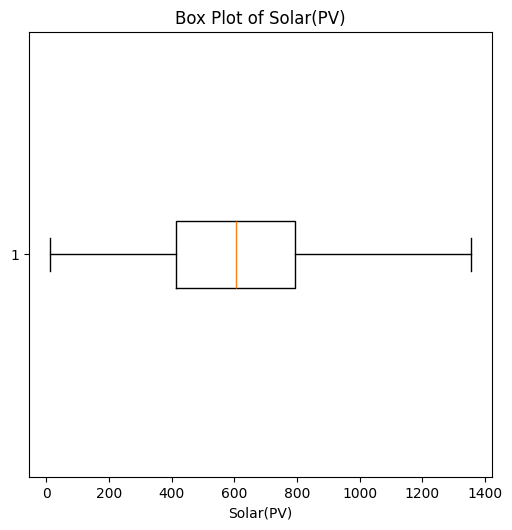

In [4385]:
mean_solar = final_cleaned_df['Solar(PV)'][final_cleaned_df['Solar(PV)'] >= 0].mean()
final_cleaned_df['Solar(PV)'] = final_cleaned_df['Solar(PV)'].apply(lambda x: mean_solar if x < 0 else x)

# Fixed DataFrame
display(final_cleaned_df.describe())

# Displaying the box plot
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, i)
plt.boxplot(final_cleaned_df['Solar(PV)'].dropna(), vert=False)
plt.title(f'Box Plot of {column}')
plt.xlabel(column)

plt.tight_layout()
plt.show()

3. Now that the outliers have been removed I'm going to use the Standard Scaler to scale the features.

In [4386]:
# Initializing the Standard Scaler
scaler = StandardScaler()

scaled_features = scaler.fit_transform(final_cleaned_df[columns])
scaled_df = pd.DataFrame(scaled_features, columns=columns)
scaled_df = pd.concat([final_cleaned_df.reset_index(drop=True).drop(columns=columns), scaled_df], axis=1)

display(scaled_df.head())

for column in columns:
    print(f"{column}: Mean={scaled_df[column].mean():.2f}, Std={scaled_df[column].std():.2f}")


,Date,AvgTemp,AverageDew,Humidity,Wind,Pressure,Solar(PV)
0,2023-01-01,0.440088,-0.621311,-0.985362,-1.862199,0.132761,-1.049367
1,2023-01-02,0.611610,-0.314951,-0.900948,-1.487213,-0.588479,-1.071847
2,2023-01-03,0.835334,-0.609964,-1.154190,-0.570583,-0.588479,-0.951669
3,2023-01-04,0.783132,-1.347497,-1.407432,-0.903903,-0.588479,-1.052599
4,2023-01-05,0.686185,-2.028296,-1.576259,-0.320592,0.132761,-1.984999


AvgTemp: Mean=-0.00, Std=1.00
AverageDew: Mean=0.00, Std=1.00
Humidity: Mean=0.00, Std=1.00
Wind: Mean=-0.00, Std=1.00
Pressure: Mean=0.00, Std=1.00
Solar(PV): Mean=-0.00, Std=1.00


4. Now I use Pearson's correlation coefficientto measure the linear relationship between two variables.
- I'll use this technique because looks at the relationship between continuous features and the target variable. This is important because we want to find what features are correlated with the target "Solar(PV)"

In [4387]:
# First we calculate the correlation matrix
correlation_matrix = final_cleaned_df[columns].corr()

# Then we need to identify features highly correlated with the target
target = 'Solar(PV)'
correlations_with_target = correlation_matrix[target].sort_values(ascending=False)

# Then we set a threshold for significant correlations
significant_features = correlations_with_target[correlations_with_target.abs() > 0.3]

# Lastly we display the significant features and their correlations with the target
significant_features

Solar(PV)     1.000000
Humidity      0.719530
AverageDew    0.660140
Wind          0.345225
Name: Solar(PV), dtype: float64

In [4388]:
print(final_cleaned_df.head())

        Date  AvgTemp  AverageDew  Humidity  Wind  Pressure   Solar(PV)
0 2023-01-01     87.9        31.3      13.4   5.7      29.2  325.260557
1 2023-01-02     90.2        34.0      14.2   6.6      29.1  319.158927
2 2023-01-03     93.2        31.4      11.8   8.8      29.1  351.777739
3 2023-01-04     92.5        24.9       9.4   8.0      29.1  324.383284
4 2023-01-05     91.2        18.9       7.8   9.4      29.2   71.311129


- Now that we have identified the features we can start building the model.

---
---

<h3 style="text-align: center;"><b>Step 3: Analyze data</b></h3>

<h4 style="text-align: center;"><b>Model Selection</b></h4>

In [4389]:
# Creating a dictionary with the performance of the models
model_performance = []

1. First I'll start by trying a Linear Regression Model with all of the numeric features.

In [4390]:
# Select all of the features and the target variable
X = scaled_df[['AvgTemp', 'AverageDew', 'Humidity', 'Wind', 'Pressure']]
y = scaled_df['Solar(PV)']

# Split the data into training and testing. 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predicting using the test set
y_pred = linear_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Adjusted R^3
n = X_test.shape[0] 
p = X_test.shape[1] 

adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
accuracy = 1 - (mse / np.var(y_test)) 

model_performance.append({
    "Model": "Linear Regression (No FS)",
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "R^2": r2,
    "Adjusted R^2": adjusted_r2,
    "Accuracy": accuracy
})

metrics_table = pd.DataFrame({
    "Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", 
               "Root Mean Squared Error (RMSE)", "R^2 Score", "Adjusted R^2 Score", "Accuracy"],
    "Value": [mae, mse, rmse, r2, adjusted_r2, accuracy]
})

print("Linear regression model without feature selection:")
display(metrics_table)


Linear regression model without feature selection:


,Metric,Value
0,Mean Absolute Error (MAE),0.349161
1,Mean Squared Error (MSE),0.224264
2,Root Mean Squared Error (RMSE),0.473565
3,R^2 Score,0.781196
4,Adjusted R^2 Score,0.765787
5,Accuracy,0.781196


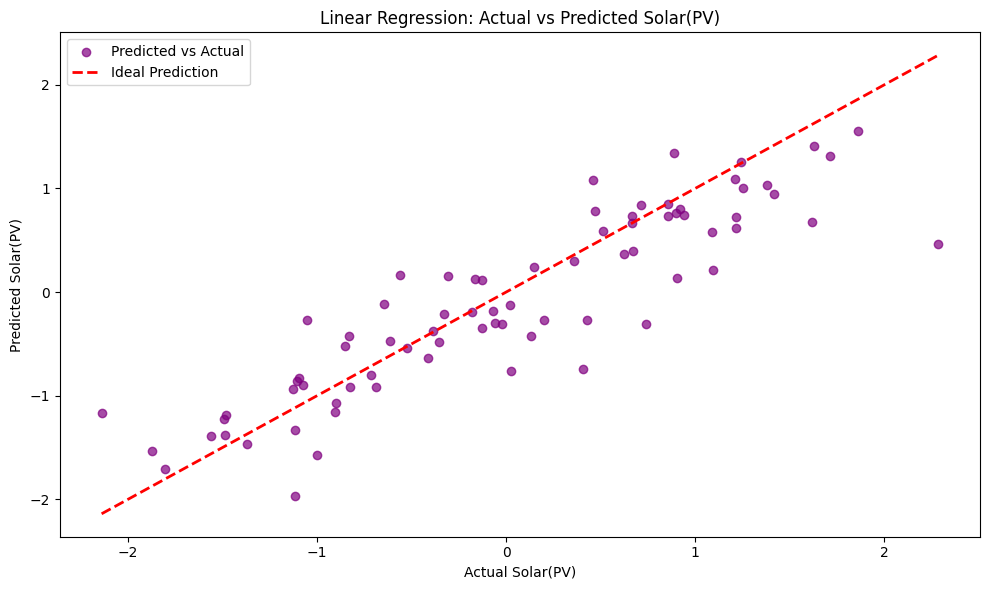

In [4391]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='purple', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Prediction')
plt.xlabel("Actual Solar(PV)")
plt.ylabel("Predicted Solar(PV)")
plt.title("Linear Regression: Actual vs Predicted Solar(PV)")
plt.legend()
plt.tight_layout()
plt.show()

- Now let's try only using the selected features.

In [4392]:
# Now we select the features based on the values we got from Pearson's Correlation
X = scaled_df[['AverageDew', 'Humidity', 'Wind']]
y = scaled_df['Solar(PV)']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Adjusted R^2
n = X_test.shape[0]  
p = X_test.shape[1] 

adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
accuracy = 1 - (mse / np.var(y_test)) 

model_performance.append({
    "Model": "Linear Regression (With FS)",
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "R^2": r2,
    "Adjusted R^2": adjusted_r2,
    "Accuracy": accuracy
})

metrics_table = pd.DataFrame({
    "Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", 
               "Root Mean Squared Error (RMSE)", "R^2 Score", "Adjusted R^2 Score", "Accuracy"],
    "Value": [mae, mse, rmse, r2, adjusted_r2, accuracy]
})

print("Linear regression model with feature selection:")
display(metrics_table)

Linear regression model with feature selection:


,Metric,Value
0,Mean Absolute Error (MAE),0.355386
1,Mean Squared Error (MSE),0.225417
2,Root Mean Squared Error (RMSE),0.474781
3,R^2 Score,0.823077
4,Adjusted R^2 Score,0.815806
5,Accuracy,0.823077


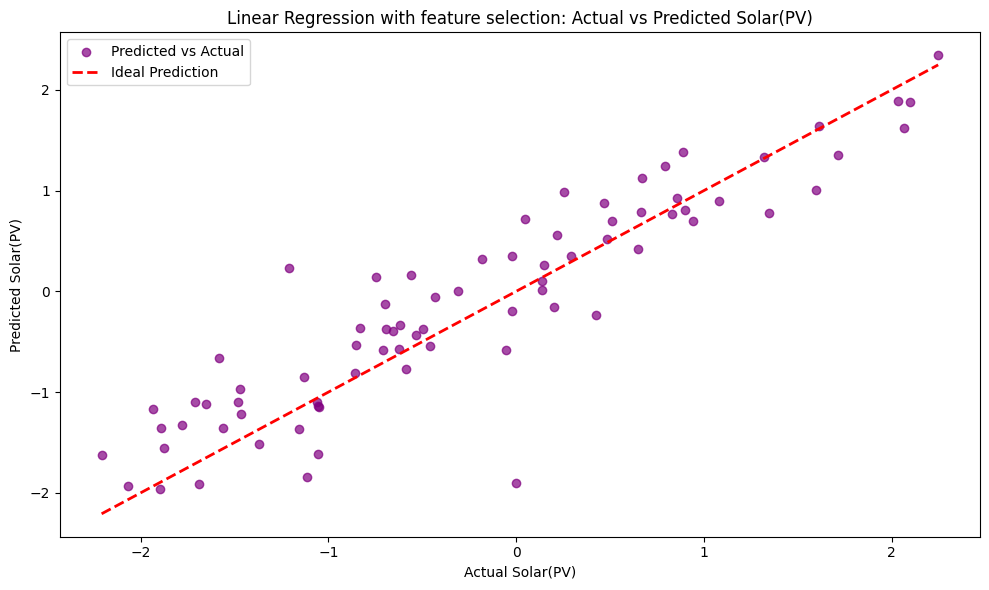

In [4393]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='purple', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Prediction')
plt.xlabel("Actual Solar(PV)")
plt.ylabel("Predicted Solar(PV)")
plt.title("Linear Regression with feature selection: Actual vs Predicted Solar(PV)")
plt.legend()
plt.tight_layout()
plt.show()

---

2. Now I'll try a Polynomial Regression Model

In [4394]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Since we have to test multiple degrees I'm going to initialize a function
def evaluate_polynomial_regression(degrees, X_train, X_test, y_train, y_test):
    results = []

    for degree in degrees:
        poly_pipeline = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False), LinearRegression())
        poly_pipeline.fit(X_train, y_train)

        y_pred = poly_pipeline.predict(X_test)

        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        explained_variance = 1 - (mse / np.var(y_test)) 
        n = X_test.shape[0]  
        p = len(poly_pipeline.named_steps['linearregression'].coef_) 
        adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

        accuracy = 1 - (mse / np.var(y_test)) 

        # Storing the results for every poly degree
        result = {
            "Model": f"Poly Regression Degree: {degree}",
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R^2": r2,
            "Adjusted R^2": adjusted_r2,
            "Accuracy": accuracy
        }

        results.append(result)
        model_performance.append(result)


    return pd.DataFrame(results)

metrics_table = pd.DataFrame({
    "Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", 
               "Root Mean Squared Error (RMSE)", "R^2 Score", "Adjusted R^2 Score", "Accuracy"],
    "Value": [mae, mse, rmse, r2, adjusted_r2, accuracy]
})

# Testing the function from 1 to 5
degrees_to_try = range(1, 6)
polynomial_results = evaluate_polynomial_regression(degrees_to_try, X_train, X_test, y_train, y_test)

print("Polynomial Regression Model:")
display(polynomial_results)

Polynomial Regression Model:


,Model,MAE,MSE,RMSE,R^2,Adjusted R^2,Accuracy
0,Poly Regression Degree: 1,0.355386,0.225417,0.474781,0.823077,0.815806,0.823077
1,Poly Regression Degree: 2,0.358029,0.203211,0.450790,0.840506,0.819081,0.840506
2,Poly Regression Degree: 3,0.347497,0.189176,0.434944,0.851522,0.802029,0.851522
3,Poly Regression Degree: 4,0.359084,0.198164,0.445156,0.844467,0.718560,0.844467
4,Poly Regression Degree: 5,0.431096,0.326722,0.571596,0.743566,0.071954,0.743566


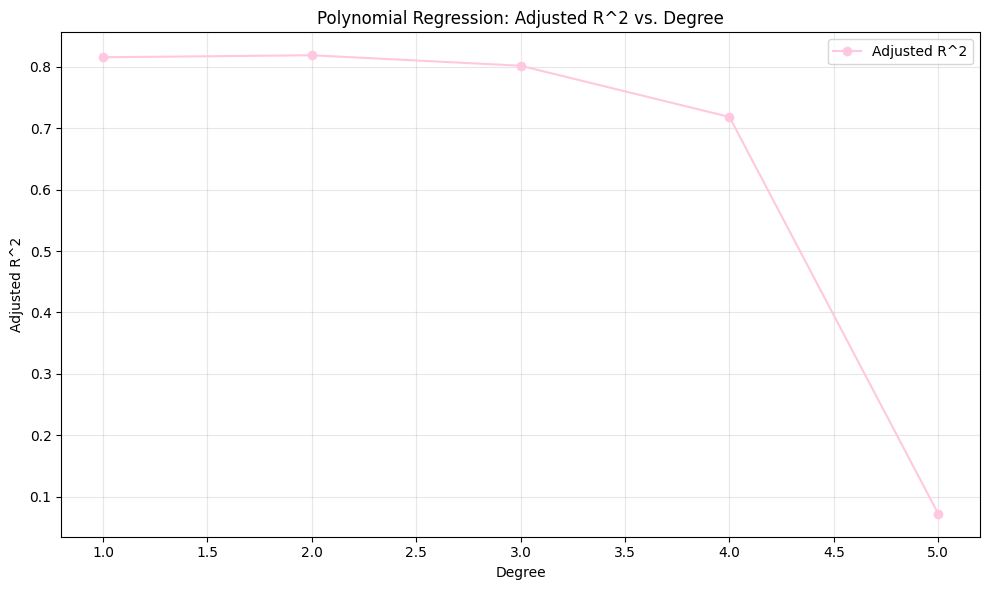

In [4395]:
# Extract Polynomial Regression Degrees 
poly_results = [
    {"Degree": int(model["Model"].split(": ")[1]), "Adjusted R^2": model["Adjusted R^2"]}
    for model in model_performance
    if "Poly Regression Degree" in model["Model"]
]

poly_results_df = pd.DataFrame(poly_results)

plt.figure(figsize=(10, 6))
plt.plot(poly_results_df["Degree"], poly_results_df["Adjusted R^2"], marker="o", label="Adjusted R^2", color=line_color)
plt.title("Polynomial Regression: Adjusted R^2 vs. Degree")
plt.xlabel("Degree")
plt.ylabel("Adjusted R^2")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

- Here we can clearly see that the best polynomial degree is 3. After 3 the value of the adjusted R^2 starts decreasing which means extreme overfitting.

---

4. Now I'll use a Lasso Regression model.

In [4396]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Lasso Model
lasso_model = Lasso(alpha=0.01, max_iter=10000, random_state=42)

lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

n_lasso = X_test.shape[0] 
p_lasso = X_test.shape[1]
adjusted_r2_lasso = 1 - ((1 - r2_lasso) * (n_lasso - 1) / (n_lasso - p_lasso - 1))

accuracy_lasso = 1 - (mse_lasso / np.var(y_test)) 

model_performance.append({
    "Model": "Lasso Regression",
    "MAE": mae_lasso,
    "MSE": mse_lasso,
    "RMSE": rmse_lasso,
    "R^2": r2_lasso,
    "Adjusted R^2": adjusted_r2_lasso,
    "Accuracy": accuracy_lasso
})

metrics_lasso_table = pd.DataFrame({
    "Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", 
               "Root Mean Squared Error (RMSE)", "R^2 Score", "Adjusted R^2 Score", "Accuracy"],
    "Value": [mae_lasso, mse_lasso, rmse_lasso, r2_lasso, adjusted_r2_lasso, accuracy_lasso]
})

print("Lasso Regression Model:")
display(metrics_lasso_table)


Lasso Regression Model:


,Metric,Value
0,Mean Absolute Error (MAE),0.355678
1,Mean Squared Error (MSE),0.225485
2,Root Mean Squared Error (RMSE),0.474852
3,R^2 Score,0.823024
4,Adjusted R^2 Score,0.815751
5,Accuracy,0.823024


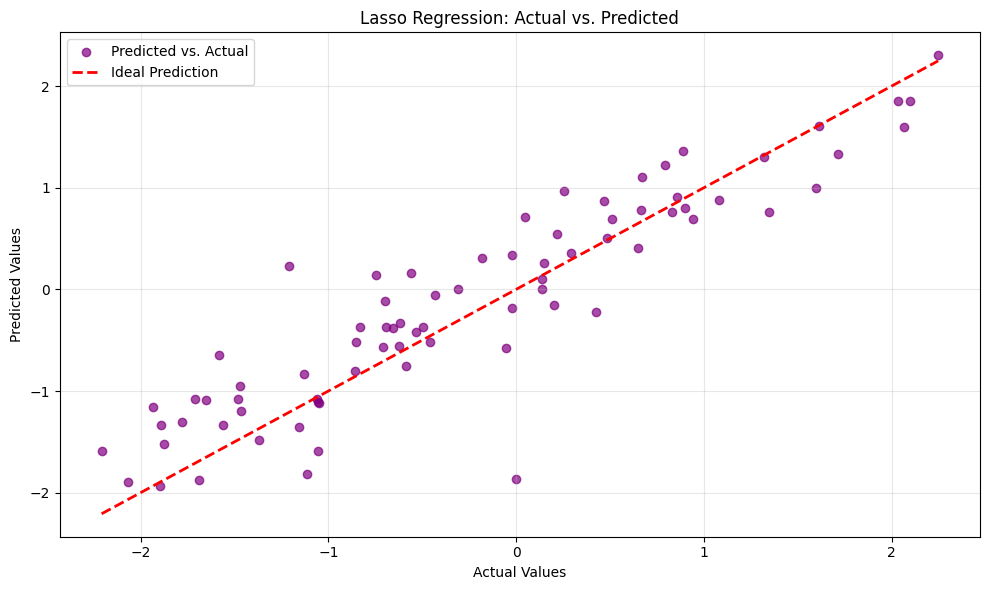

In [4397]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.7, color='PURPLE', label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Prediction')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Lasso Regression: Actual vs. Predicted")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

---

5. Now I'll try the Ridge Regression Model

In [4398]:
# Initializing the mdoel
ridge_model = Ridge(alpha=0.01, max_iter=10000, random_state=42)

# Training the model
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

n_ridge = X_test.shape[0]  
p_ridge = X_test.shape[1]  
adjusted_r2_ridge = 1 - ((1 - r2_ridge) * (n_ridge - 1) / (n_ridge - p_ridge - 1))
accuracy_ridge = 1 - (mse_ridge / np.var(y_test)) 

model_performance.append({
    "Model": "Ridge Regression",
    "MAE": mae_ridge,
    "MSE": mse_ridge,
    "RMSE": rmse_ridge,
    "R^2": r2_ridge,
    "Adjusted R^2": adjusted_r2_ridge,
    "Accuracy": accuracy_ridge
})

metrics_ridge_table = pd.DataFrame({
    "Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", 
               "Root Mean Squared Error (RMSE)", "R^2 Score", "Adjusted R^2 Score", "Accuracy"],
    "Value": [mae_ridge, mse_ridge, rmse_ridge, r2_ridge, adjusted_r2_ridge, accuracy_ridge]
})

print("Ridge Regression Model:")
display(metrics_ridge_table)

Ridge Regression Model:


,Metric,Value
0,Mean Absolute Error (MAE),0.355387
1,Mean Squared Error (MSE),0.225417
2,Root Mean Squared Error (RMSE),0.474781
3,R^2 Score,0.823077
4,Adjusted R^2 Score,0.815806
5,Accuracy,0.823077


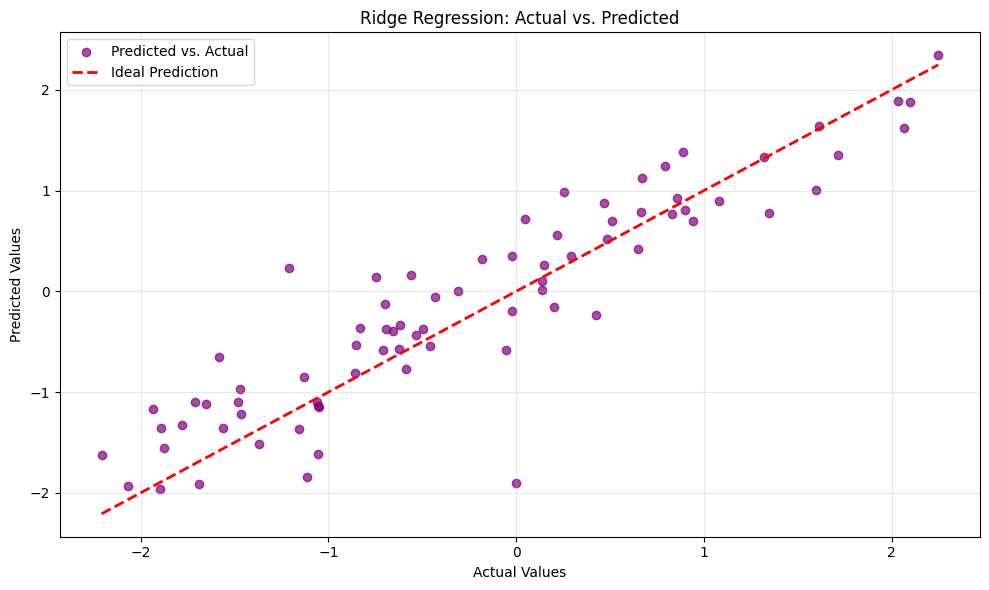

In [4399]:
# Visualize the actual vs. predicted values using a scatter plot for the Ridge Regression model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.7, color='purple', label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Prediction')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Ridge Regression: Actual vs. Predicted")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

---

6. Now I'm going to try the Regression Tree Model.

In [4400]:
# Initialize the Decision Tree Regressor with default parameters
tree_model = DecisionTreeRegressor(random_state=42)

tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test, y_pred_tree)

n_tree = X_test.shape[0]  
p_tree = X_test.shape[1]  
adjusted_r2_tree = 1 - ((1 - r2_tree) * (n_tree - 1) / (n_tree - p_tree - 1))

accuracy_tree = 1 - (mse_tree / np.var(y_test)) 

model_performance.append({
    "Model": "Regression Tree",
    "MAE": mae_tree,
    "MSE": mse_tree,
    "RMSE": rmse_tree,
    "R^2": r2_tree,
    "Adjusted R^2": adjusted_r2_tree,
    "Accuracy": accuracy_tree
})

metrics_tree_table = pd.DataFrame({
    "Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", 
               "Root Mean Squared Error (RMSE)", "R^2 Score", "Adjusted R^2 Score", "Accuracy"],
    "Value": [mae_tree, mse_tree, rmse_tree, r2_tree, adjusted_r2_tree, accuracy_tree]
})

print("Regression Tree Model:")
display(metrics_tree_table)

Regression Tree Model:


,Metric,Value
0,Mean Absolute Error (MAE),0.490879
1,Mean Squared Error (MSE),0.394879
2,Root Mean Squared Error (RMSE),0.628394
3,R^2 Score,0.690072
4,Adjusted R^2 Score,0.677335
5,Accuracy,0.690072


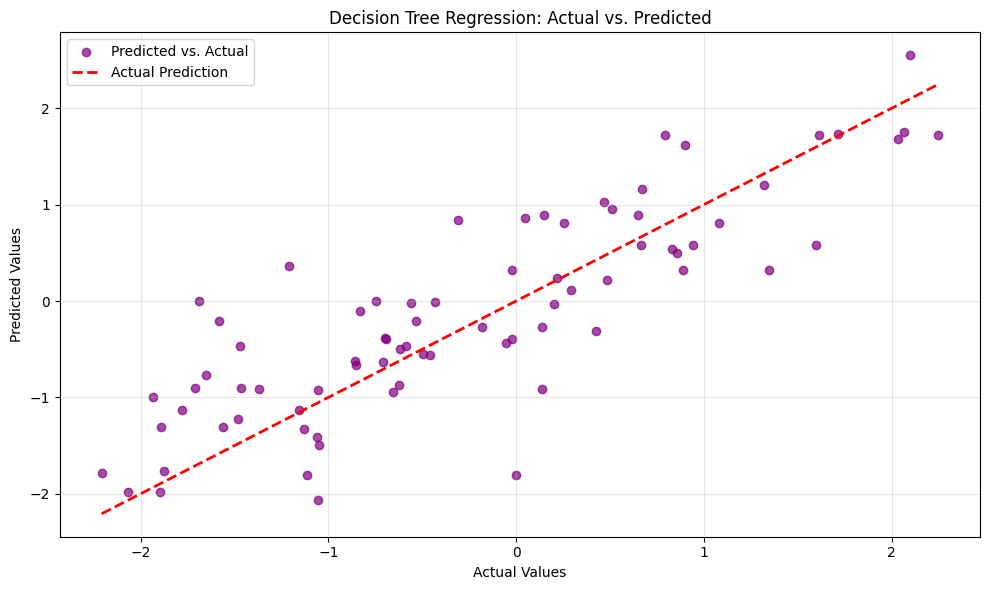

In [4401]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tree, alpha=0.7, color='purple', label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Actual Prediction')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Decision Tree Regression: Actual vs. Predicted")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

---

<h4 style="text-align: center;"><b>Performance of every model</b></h4>

In [4402]:
performance_df = pd.DataFrame(model_performance)
display(performance_df)

,Model,MAE,MSE,RMSE,R^2,Adjusted R^2,Accuracy
0,Linear Regression (No FS),0.349161,0.224264,0.473565,0.781196,0.765787,0.781196
1,Linear Regression (With FS),0.355386,0.225417,0.474781,0.823077,0.815806,0.823077
2,Poly Regression Degree: 1,0.355386,0.225417,0.474781,0.823077,0.815806,0.823077
3,Poly Regression Degree: 2,0.358029,0.203211,0.450790,0.840506,0.819081,0.840506
4,Poly Regression Degree: 3,0.347497,0.189176,0.434944,0.851522,0.802029,0.851522
5,Poly Regression Degree: 4,0.359084,0.198164,0.445156,0.844467,0.718560,0.844467
6,Poly Regression Degree: 5,0.431096,0.326722,0.571596,0.743566,0.071954,0.743566
7,Lasso Regression,0.355678,0.225485,0.474852,0.823024,0.815751,0.823024
8,Ridge Regression,0.355387,0.225417,0.474781,0.823077,0.815806,0.823077
9,Regression Tree,0.490879,0.394879,0.628394,0.690072,0.677335,0.690072


**Linear Regression (No FS)**
- Good performance with an R^2 of 0.781 and Adjusted R^2 of 0.766.
- Slightly higher error compared to model with feature selection or polynomial regression.

**Linear Regression (With FS)**
- Improved R² (0.823) and Adjusted R^2 0.816 over the model without feature selection.
- Errors are nearly the same as the model without feature selection.

**Poly Regression:**
- Degree 1 is equivalent to Linear Regression with feature selection.
- Degree 2 shows improvement with lower errors RMSE = 0.451 and a higher R^2 0.841.
- Degree 3 achieves the best performance with the lowest errors RMSE = 0.435 and the highest R^2 0.852.
- Degree 4 and 5 start overfitting, as seen by increasing RMSE and decreasing Adjusted R^2.

**Lasso Regression**	
- Performs similarly to Linear Regression with feature selection.
- More robust because of regularization but does not outperform Polynomial Regression.

**Ridge Regression**
- Matches Lasso Regression and Linear Regression with feature selection.
- Indicates that regularization does not significantly improve performance in this case.

**Regression Tree**
- Lowest performance among models R^2 = 0.690, Adjusted R^2 = 0.677.
- Higher errors RMSE = 0.628 suggest that the tree model may not capture relationships in the data effectively.

#### **CONCLUSION:** The Best Model to predict the solar power is Polynomial Regression (Degree 3)